# Яблоко

### Указать пути до папки с картинками и папки вывода, а также первый и последний кадры включительно
### Specify the paths to the folder with images and the output folder, as well as the first and last frames number (include borders)
### Geben Sie die Pfade zum Ordner mit Bildern und zum Ausgabeordner sowie die Nummer des ersten und letzten Bildes an (einschließlich Rahmen).
frames here: https://disk.yandex.ru/d/7FR-UM1BKMAoCA

In [1]:
# со слешем, обязательно
# with slash required
# mit Schrägstrich erforderlich
input_path = "C:/Users/razch/Documents/bad_apple/" 
output_path = "C:/Users/razch/Documents/frames/"

start_frame = 3567
end_frame = 4499

Дальше ничего менять не нужно</br>
Nothing further needs to be changed</br>
Es muss nichts weiter geändert werden

In [2]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

'''
0->
|    image[y][x]
v
'''
# загружаем кортиночки. каждый их элемент это
# текстура - (r, g, b), где они от 0 до 255
# карта высот - double от 0 до 1


f_id = "0"*(4-len(str(start_frame))) + str(start_frame)
texture = np.array(Image.open(f"{input_path}apple{f_id}.png").convert("RGB"))
heightmap = np.zeros((360, 480))
print(texture.shape)
for x in range(480):
    for y in range(360):
        heightmap[y][x] = texture[y][x][0] / 256.0

# это будет наше окно итоговое
viewport = np.zeros((420, 640, 3), dtype=np.uint8)

# это для вида лучей сверху
raycast = texture.copy()

(360, 480, 3)


In [3]:
def updateMaps(file, texture, heightmap):
    file = np.array(Image.open(file).convert("RGB"))
    for x in range(480):
        for y in range(360):
            texture[y][x] = file[y][x]
            heightmap[y][x] = texture[y][x][0] / 256.0
    

In [4]:
# рисует полоску на вьюпорте canvas, цвета color, одну из screen_width (кол-во лучей) начиная с заданных координат и вниз
def draw_strip(canvas, color, start_y, start_x, screen_width):
    height, width, _ = canvas.shape
    start_y = max(0, start_y)
    for x in range(start_x, min(width, 1+start_x + math.ceil(width/screen_width))):
        for y in range(start_y, height):
            canvas[y][x] = color

In [5]:
# функция для выпрямления плоскости
def linear_to_non(value):
    return (0.25 - (value-0.5) ** 2) ** 0.5
    #return (1-(value-1)**2)**0.5

# отрисовка окна зрения, по сути рендер
def draw_plane(canvas, x, y, screen_width, z, horizon, texture, heightmap, flat=True, minimap=None):
    
    # закрашиваем изначально все голубым
    sky = (0, 0, 0)
    height, width, _ = canvas.shape

    #screen_width = min(width, screen_width)
    # размеры карты
    dimens = heightmap.shape
    
    #plane = np.zeros((z, screen_width, 3), dtype=np.uint8)
    for xx in range(width):
        for yy in range(height):
            canvas[yy][xx] = sky
            
    # так же кидаем лучи, теперь не просто для их отображения, но и для построения картинки
    lp = [x-z, y-z]
    rp = [x+z, y-z]
    dx = round(abs(rp[0]-lp[0]) / screen_width)
    rays_x = list(range(lp[0], rp[0], dx))
    
    # фиксировать цвет будем только то количество раз, сколько пикселей в кадре без горизона
    y_borders = [0, height]
    for start_y in range(y_borders[0], y_borders[1]):
        #n += 1
        
        persp_koef = 1.0 * (start_y / y_borders[1])
        persp_koef = 1
        surf_persp = (start_y / y_borders[1]) ** 2
        # находим слой для луча на карте, который будет соответствовать этому ряду в картинке
        yy = y-z + round((start_y - y_borders[0]) / (y_borders[1]-y_borders[0]) * z * 0.8)
        for i in range(len(rays_x)):
            
            ray_x = rays_x[i]
            
            # находим пересечение луча со слоем. Проверяем выход за границы
            xx = round(((yy - lp[1]) * (x - ray_x) / (y - lp[1])) + ray_x)
            if (yy >= 0) and (yy < dimens[0]) and (xx >= 0) and (xx < dimens[1]):
                
                color = texture[yy][xx]
                
                # добавка высоты по карте высот для пикселя
                extra_h = round(50 * (1-heightmap[yy][xx]) * surf_persp) * (not flat)
                start_x = math.floor(i * width / len(rays_x))
                # отрисовка полоски
                draw_strip(canvas, color, round(height * surf_persp) - extra_h, start_x, screen_width)
                if not minimap is None:
                    minimap[yy][xx] = sky

In [6]:
print("In progress...")
for i in range(start_frame, end_frame+1, 1):
    id = "0"*(4-len(str(i))) + str(i)
    updateMaps(f"{input_path}apple{id}.png", texture, heightmap)
    draw_plane(canvas=viewport, x=240, y=500, screen_width=640, z=600, horizon=350, texture=texture, heightmap=heightmap, flat=False)
    Image.fromarray(viewport).save(f"{output_path}frame{id}.png")
    print(id)

In progress...
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763


# Ну хотите запустите, это просто 1 кадр

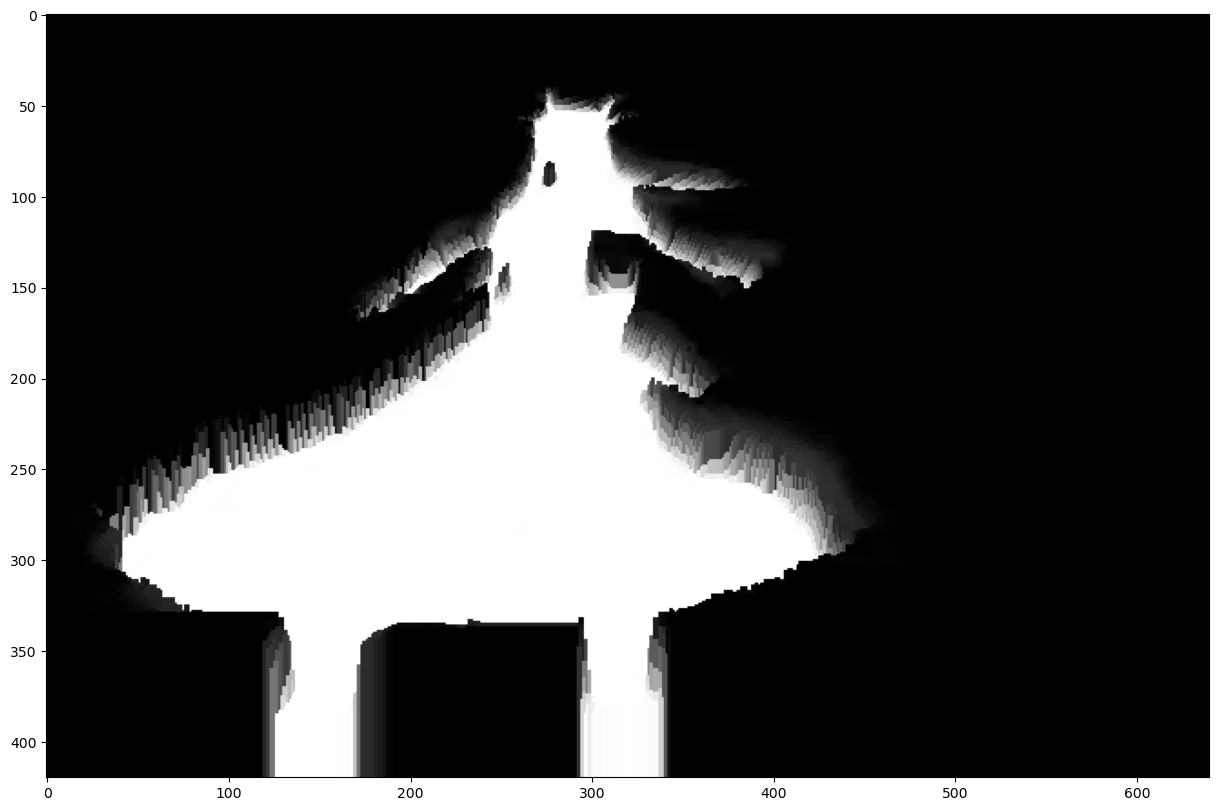

In [7]:
draw_plane(canvas=viewport, x=240, y=500, screen_width=640, z=600, horizon=350, texture=texture, heightmap=heightmap, flat=False, minimap=raycast)
fig = plt.figure(figsize=(15, 10))
plt.imshow(viewport)
plt.show()

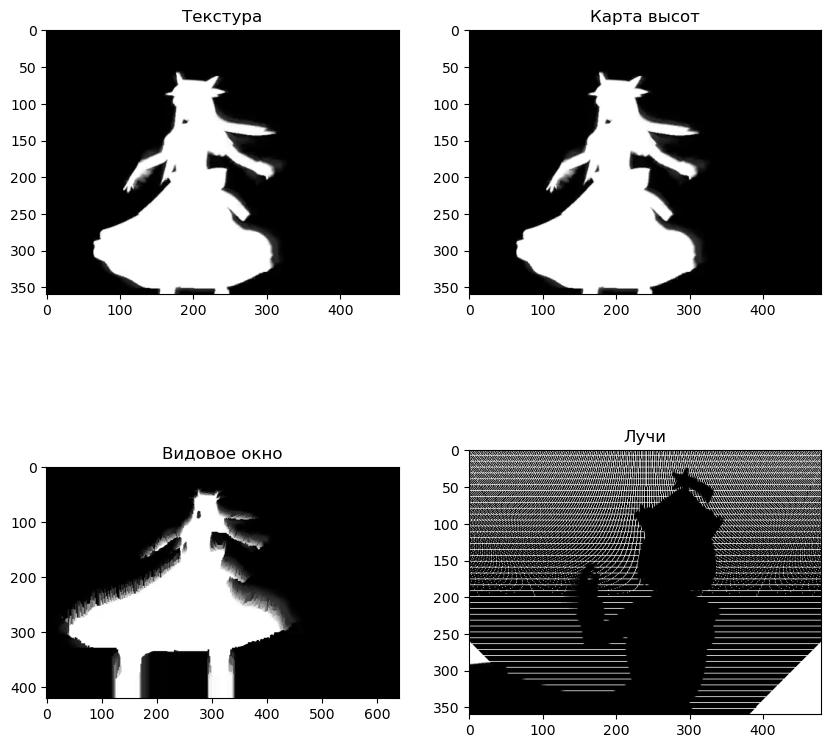

Thank you, comrade!


In [8]:
# ну и куда же без общего вывода
fig, ((texture_fig, heightmap_fig), (viewport_fig, raycast_fig)) = plt.subplots(2, 2, figsize=(10, 10))

texture_fig.imshow(texture)
texture_fig.set_title('Текстура')

heightmap_fig.imshow(heightmap, cmap='gray')
heightmap_fig.set_title('Карта высот')

viewport_fig.imshow(viewport)
viewport_fig.set_title('Видовое окно')

raycast_fig.imshow(raycast)
raycast_fig.set_title('Лучи')

plt.show()

print("Thank you, comrade!")